In [1]:
import sys

sys.path.insert(0, '/Users/Cinus/Work/Progetti/WoMG/WoMG/src/')
import test_version

/Users/Cinus/Work/Progetti/WoMG/WoMG/src/test_version


In [2]:
import numpy as np
from test_version import womg
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = '../womg/womgdata/docs/demo_corpus/'
prop = womg(graph=g, docs_path=docs_path, seed=42)

Formatting graph..



Creating interests..
Training LDA model..
loading pre-trained LDA
Extracting topic distribution from docs in  ../womg/womgdata/docs/demo_corpus/
Computing cascades.. 
WoMG diffusion has been completed.


In [6]:
!cat ../Output/Topics_descript0.txt

[(0, '0.021*"said" + 0.015*"percent" + 0.011*"million" + 0.008*"new" + 0.008*"year" + 0.007*"billion" + 0.005*"company" + 0.005*"market" + 0.004*"bank" + 0.004*"prices"'), (1, '0.026*"said" + 0.006*"people" + 0.006*"space" + 0.005*"miles" + 0.005*"water" + 0.004*"area" + 0.004*"city" + 0.004*"damage" + 0.004*"state" + 0.003*"buildings"'), (2, '0.031*"said" + 0.007*"police" + 0.007*"government" + 0.007*"soviet" + 0.005*"people" + 0.005*"day" + 0.005*"president" + 0.005*"united" + 0.004*"military" + 0.004*"officials"'), (3, '0.031*"said" + 0.006*"house" + 0.006*"court" + 0.005*"bush" + 0.005*"state" + 0.004*"president" + 0.004*"office" + 0.004*"senate" + 0.003*"people" + 0.003*"drug"'), (4, '0.009*"said" + 0.005*"year" + 0.005*"like" + 0.005*"its" + 0.005*"new" + 0.004*"time" + 0.004*"years" + 0.004*"it" + 0.004*"old" + 0.003*"school"')]

In [10]:
NODE_SIZE = 600
pos = nx.get_node_attributes(g, 'pos')

def plot_graph(node_color, cmap):
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off')  

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


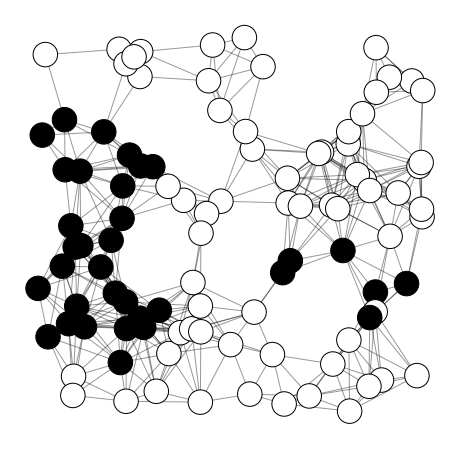

In [11]:
item = 0
activations = np.zeros(N)
active_nodes = [node for _time, node in prop.propagations[item]]
activations[active_nodes] = 1
plot_graph(activations, plt.cm.binary)

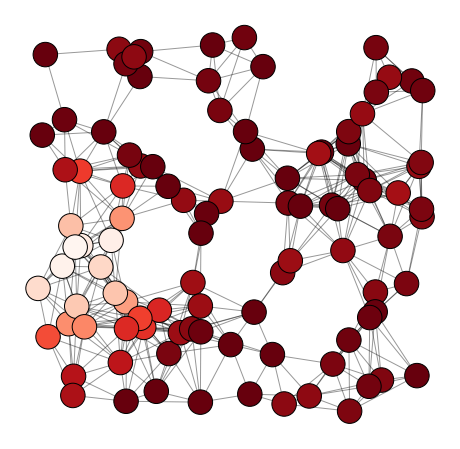

In [12]:
component = np.argmax(prop.topic_distributions[:,item])
component_interest = [prop.interests[component,node] for node in range(N)]
plot_graph(component_interest, plt.cm.Reds_r)

In [ ]:
! rm -r ../Output/

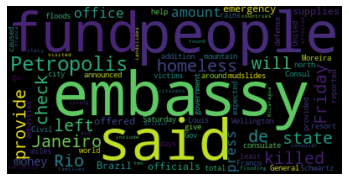

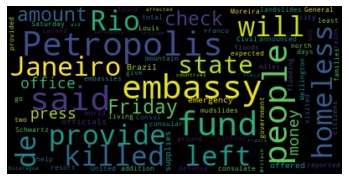

In [26]:

from wordcloud import WordCloud

# Read the whole text.
text = open(docs_path+'AP880212-0078.txt').read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame({'A': [1,2,3], 'B':[4,5,6]})
display(df)

,A,B
0,1,4
1,2,5
2,3,6


In [35]:
df_shift = df.copy()
df_shift.index += .5
a = pd.concat([df, df_shift])
b = pd.DataFrame({'C':[11,12,13,14,15,16], 'i':[0.0,0.5,1.0,1.5,2.0,2.5]}).set_index('i')
a = a/2
b = b.join(a)

In [36]:
def my_test2(row):
    return row.A % row.B  

b['Value'] = b[['A', 'B']].apply(my_test2, axis=1)

In [37]:
b

,C,A,B,Value
i,,,,
0.0,11,0.5,2.0,0.5
0.5,12,0.5,2.0,0.5
1.0,13,1.0,2.5,1.0
1.5,14,1.0,2.5,1.0
2.0,15,1.5,3.0,1.5
2.5,16,1.5,3.0,1.5
